# Reddit NLP Classifier

## Data Processing & EDA (3/4)

## Contents
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)


## Data Preprocessing

### All libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from bs4 import BeautifulSoup  

import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Change to display the max number of rows and columns
# Reference: https://kakakakakku.hatenablog.com/entry/2021/04/19/090229
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Import

In [3]:
# Read in the data 
df = pd.read_csv('../data/subreddits_combined_clean.csv')
df.head()

,subreddit,body
0,malefashionadvice,Definitely agree there’s personality there. Se...
1,malefashionadvice,You're looking for high fashion designers bro....
2,malefashionadvice,"Yeah, I’d add photos if I knew exactly what I ..."
3,malefashionadvice,[cool cardigan](https://i.pinimg.com/736x/80/6...
4,malefashionadvice,"Workout clothes, sleepwear, and socks.\n\nI kn..."


### Remove special characters

A new function was created to remove special characters such as `\n` (new line character), `&gt;` (>) and `&lt;` (<), `#x200B;` (zero width space), and `'[^ ]+\.[^ ]+'` (http links). `&amp`(&) was also replaced to `and`.     

In [4]:
# Write a function to remove some special characters
# Rerefence: https://book.impress.co.jp/books/1120101182
# Reference: https://stackoverflow.com/questions/5068951/what-do-lt-and-gt-stand-for#:~:text=%3C%20stands%20for%20lesser%20than,greater%20than%20(%3E)%20symbol%20.
# Reference: https://forums.zotero.org/discussion/36355/code-for-zero-width-space
# Reference: https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

def preprocessing(text): 
    # Remove new line 
    text = text.replace('\n', ' ')
    
    # Remove &gt; (>) and &lt; (<) 
    text = text.replace('&gt;',' ')
    text = text.replace('&lt;',' ')
    
    # Replace &amp to and
    text = text.replace('&amp','and')
    
    # Remote #x200B; (zero width space)
    text = text.replace('#x200B;',' ')   
    
    # Remove http weblinks
    text = re.sub('[^ ]+\.[^ ]+','', text)
    
    return text 

In [5]:
# Apply the above function
df['body_preprocessed'] = df['body'].apply(preprocessing)

In [6]:
# Review first five rows of data
df.head()

,subreddit,body,body_preprocessed
0,malefashionadvice,Definitely agree there’s personality there. Se...,Definitely agree there’s personality there. Se...
1,malefashionadvice,You're looking for high fashion designers bro....,You're looking for high fashion designers bro....
2,malefashionadvice,"Yeah, I’d add photos if I knew exactly what I ...","Yeah, I’d add photos if I knew exactly what I ..."
3,malefashionadvice,[cool cardigan](https://i.pinimg.com/736x/80/6...,[cool excited for this to come!
4,malefashionadvice,"Workout clothes, sleepwear, and socks.\n\nI kn...","Workout clothes, sleepwear, and socks. I know..."


### Tokenization (Stopwords Removal), Lemmatization

Another new function was created to do additional data preprocessing including tokenization, stopwords removal and lemmatization. 

In [7]:
# Review types of stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Write a function to tokenize data 
# Reference: GA's 504 NLP1 Lesson 
# Reference: https://stackoverflow.com/questions/46105180/typeerror-expected-string-or-bytes-like-object-with-python-nltk-word-tokenize
# Reference: https://pythonspot.com/nltk-stop-words/#:~:text=The%20stopwords%20in%20nltk%20are,defined%20and%20cannot%20be%20removed
# Reference: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# Reference: https://stackoverflow.com/questions/67083987/lemmatize-df-column

def tokenizing(text):
    # Lowercase everything 
    lower_words = text.lower()
    
    # Get texttext_low
    clean_words = BeautifulSoup(lower_words).text
    
    # Separate things in multiple words 
    words = clean_words.split()
    
    # Initially, included this code to remove stop words 
    # Later this was removed because it gives better model performance
    stopwords_text = ' '.join([w for w in words]) #if w not in stopwords.words('english')])
    
    # Instantiate Tokenizer     
    tokenizer = RegexpTokenizer(r'\w+')

    # Apply Tokenizer
    text_tokens = tokenizer.tokenize(stopwords_text.lower())
    
    # Instantiate Lemmatizer and apply
    wn = WordNetLemmatizer()
    filtered_text = ' '.join([wn.lemmatize(w) for w in text_tokens])
    
    # Return results 
    return filtered_text

In [9]:
# Create a new column to apply above function 
df['body_preprocessed'] = df['body_preprocessed'].apply(lambda x: tokenizing(x))

/Users/ayakohomma/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [10]:
# Review
df.head()

,subreddit,body,body_preprocessed
0,malefashionadvice,Definitely agree there’s personality there. Se...,definitely agree there s personality there see...
1,malefashionadvice,You're looking for high fashion designers bro....,you re looking for high fashion designer bro t...
2,malefashionadvice,"Yeah, I’d add photos if I knew exactly what I ...",yeah i d add photo if i knew exactly what i wa...
3,malefashionadvice,[cool cardigan](https://i.pinimg.com/736x/80/6...,cool excited for this to come
4,malefashionadvice,"Workout clothes, sleepwear, and socks.\n\nI kn...",workout clothes sleepwear and sock i know it s...


### Exploratory Data Analysis

### The word counts by subreddits¶

A new column called `word_count` was created to count the number of words in each subreddit post. The histogram charts represent the distribution of word counts by each subreddit. While both charts show right-skewed distribution, comments in r/malefashionadvice tend to have more a lower word count than those in r/femalefashionadvice.

In [11]:
# Create a new column called word_count that contains the number of words in each post
# Reference: the GA's Lab 5.02 NLP
df['word_count'] = [len(w.split()) for w in df['body_preprocessed']]
df.head()

,subreddit,body,body_preprocessed,word_count
0,malefashionadvice,Definitely agree there’s personality there. Se...,definitely agree there s personality there see...,21
1,malefashionadvice,You're looking for high fashion designers bro....,you re looking for high fashion designer bro t...,60
2,malefashionadvice,"Yeah, I’d add photos if I knew exactly what I ...",yeah i d add photo if i knew exactly what i wa...,69
3,malefashionadvice,[cool cardigan](https://i.pinimg.com/736x/80/6...,cool excited for this to come,6
4,malefashionadvice,"Workout clothes, sleepwear, and socks.\n\nI kn...",workout clothes sleepwear and sock i know it s...,39


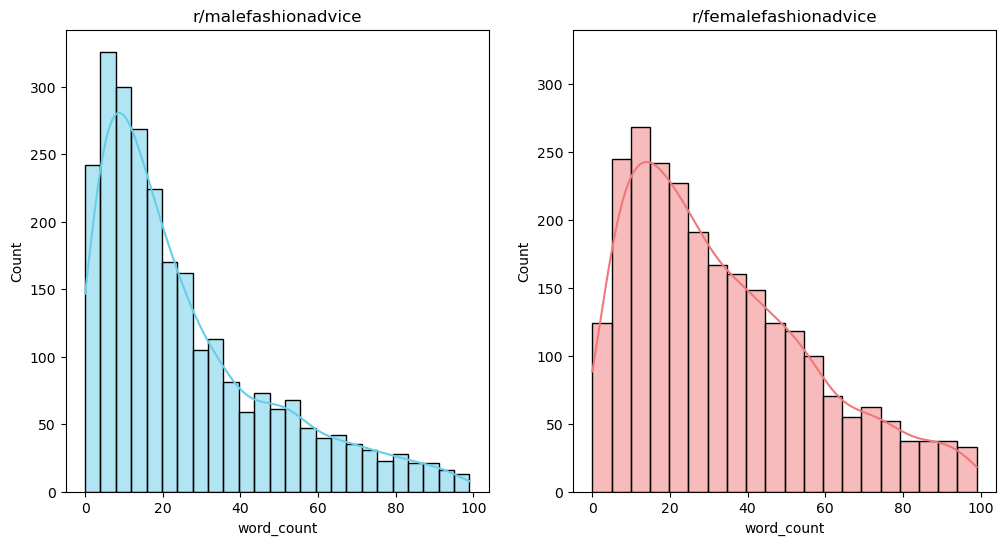

In [12]:
# Use visuals to show the distribution of post word counts by subreddits
# Reference: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn
# Reference: https://www.statology.org/seaborn-title/
 
# Create datasets
df_mal = df[df['subreddit'] == 'malefashionadvice']
df_mal1 = df_mal[df_mal['word_count'] < 100]
df_fem = df[df['subreddit'] == 'femalefashionadvice']
df_fem2 = df_fem[df_fem['word_count'] < 100]

# Create a plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data = df_mal1, 
             x = 'word_count', 
             kde = True, 
             color = '#67CDE9', 
             ax=axes[0]).set(title='r/malefashionadvice')
sns.histplot(data = df_fem2, 
             x = 'word_count', 
             kde = True, 
             color = '#F0787A',  
             ax=axes[1]).set(title='r/femalefashionadvice')
plt.ylim(0, 340);

### Counting a single word using Count Vectorizer

The below bar charts represent the most occuring single word in each subreddit. The most common single words in `r/malefashionadvice` include fashion items like pant, shirt, and suits, while `r/femalefashionadvice` had words like dress, pants, and jean. This suggests that there are differences in fashion interests between the two subreddits. 

In [13]:
# Create label column 
df['subreddit_label'] = df['subreddit'].map({'malefashionadvice': 1, 
                                             'femalefashionadvice': 0})
df.head(1)

,subreddit,body,body_preprocessed,word_count,subreddit_label
0,malefashionadvice,Definitely agree there’s personality there. Se...,definitely agree there s personality there see...,21,1


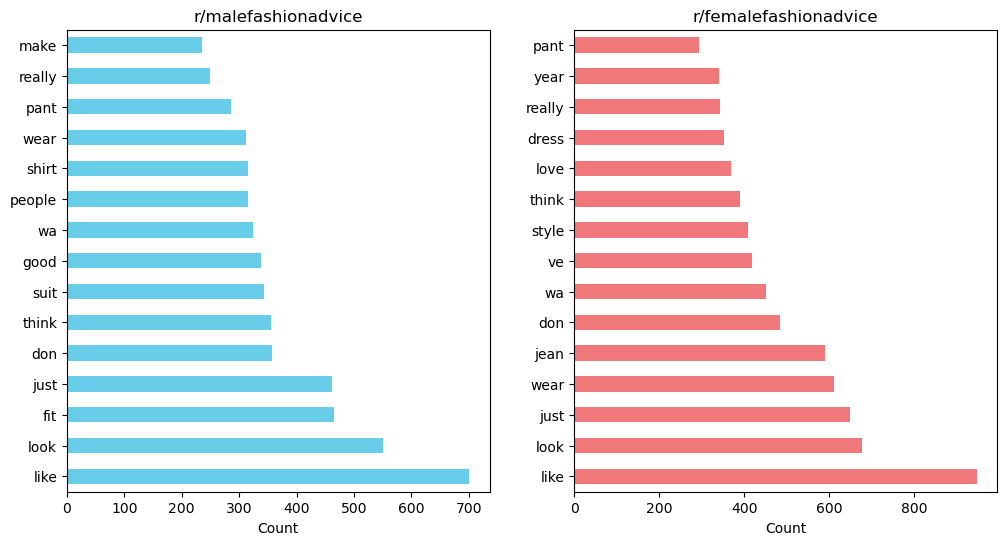

In [14]:
# Create a plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot r/malefashionadvice subreddit
cvec = CountVectorizer(stop_words='english')
mal_cvec = cvec.fit_transform(df['body_preprocessed'][df['subreddit']=='malefashionadvice'])
mal_df = pd.DataFrame(mal_cvec.todense(), columns=cvec.get_feature_names_out())
mal_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', ax=axes[0], color = '#67CDE9')
axes[0].set_title('r/malefashionadvice')
axes[0].set_xlabel('Count');

# Plot r/femalefashionadvice subreddit
cvec = CountVectorizer(stop_words='english')
fem_cvec = cvec.fit_transform(df['body_preprocessed'][df['subreddit']=='femalefashionadvice'])
fem_df = pd.DataFrame(fem_cvec.todense(), columns=cvec.get_feature_names_out())
fem_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', ax=axes[1], color = '#F0787A')
axes[1].set_title('r/femalefashionadvice')
axes[1].set_xlabel('Count');

### Counting two-word combinations using Count Vectorizer

The below yellow chart shows top 15 two-word combinations occurring on both subreddits. These combinations include phrases like `look like`, `feel like`, `look good`, `don't know`, `don't think`, and `make look`, suggesting that users on both subreddits are seeking fashion advice. However, when looking at the top 15 two-word combinations on each subreddit separately, there are some differences. On `r/malefashionadvice`, the most frequently used phrases include `sport coat` and `slim fit`, while on `r/femalefashionadvice`, popular phrases include `high rise`, `straight leg`, `high waisted`, `wide leg`, and `skinny jeans`. This indicates that there are different fashion styles being discussed on each subreddit. Also, users on `r/malefashionadvice` often share brand names such as `New Balance` and `Loro Piana`, which were frequently mentioned. 

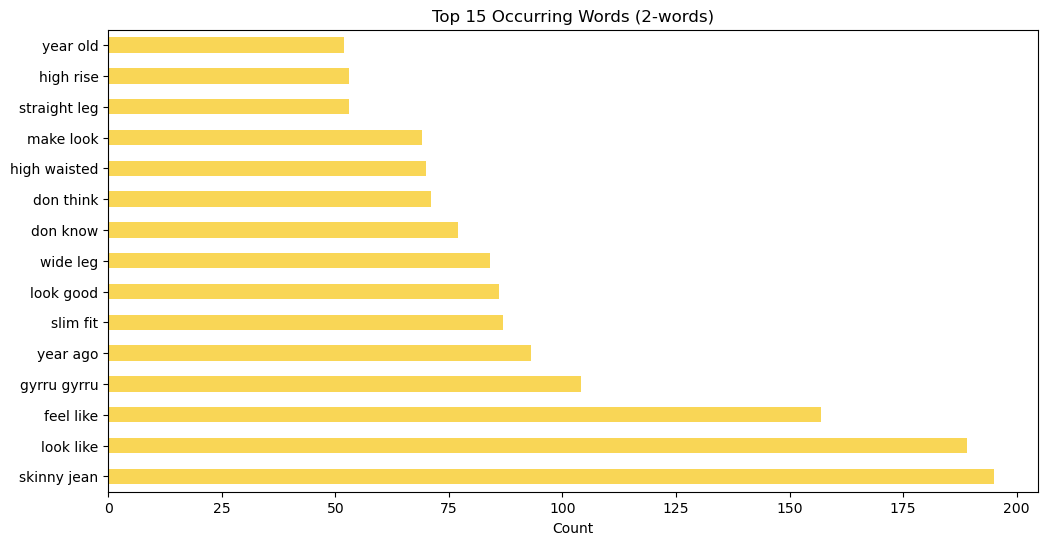

In [15]:
cvec = CountVectorizer(ngram_range = (2,2), stop_words='english')

# Fit and transform the corpus
words_cvec = cvec.fit_transform(df['body_preprocessed'])

# Convert X_train into a dataFrame 
words_df = pd.DataFrame(words_cvec.todense(), columns=cvec.get_feature_names_out())

# Plot top 10 occuring words 
words_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                            figsize = (12,6), 
                                                            color='#F9D656')
plt.title('Top 15 Occurring Words (2-words)')
plt.xlabel('Count');

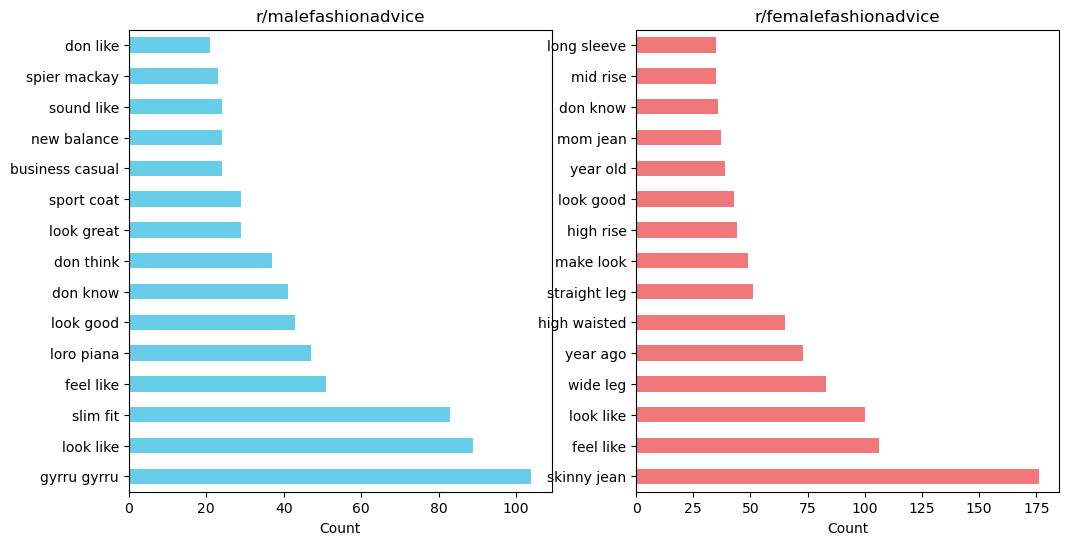

In [16]:
# Create a plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for r/malefashionadvice subreddit
cvec = CountVectorizer(ngram_range = (2,2), stop_words='english')
mal_cvec = cvec.fit_transform(df['body_preprocessed']
                              [df['subreddit']=='malefashionadvice'])
mal_df = pd.DataFrame(mal_cvec.todense(), columns=cvec.get_feature_names_out())
mal_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                          ax=axes[0], 
                                                          color = '#67CDE9')
axes[0].set_title('r/malefashionadvice')
axes[0].set_xlabel('Count');

# Plot for r/femalefashionadvice subreddit
cvec = CountVectorizer(ngram_range = (2,2), stop_words='english')
fem_cvec = cvec.fit_transform(df['body_preprocessed']
                              [df['subreddit']=='femalefashionadvice'])
fem_df = pd.DataFrame(fem_cvec.todense(), columns=cvec.get_feature_names_out())
fem_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                          ax=axes[1], 
                                                          color = '#F0787A')
axes[1].set_title('r/femalefashionadvice')
axes[1].set_xlabel('Count');

### Save this dataset

After data preprocessing and EDA proess, the new dataset was saved into csv. 

In [17]:
df.shape

(5544, 5)

In [18]:
# Save the clean data in csv
df.to_csv('../data/subreddits_preprocessing_eda.csv', index = False)

In [19]:
#Presentation Colors: 
# FF7343 / #F9D656 / #67CDE9 / #F0787A / #271200 / #FEF7DC / #EEF6F7